## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 005 Example 008

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_squared_error, median_absolute_error, explained_variance_score

import os
import numpy as np

from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

## Part A

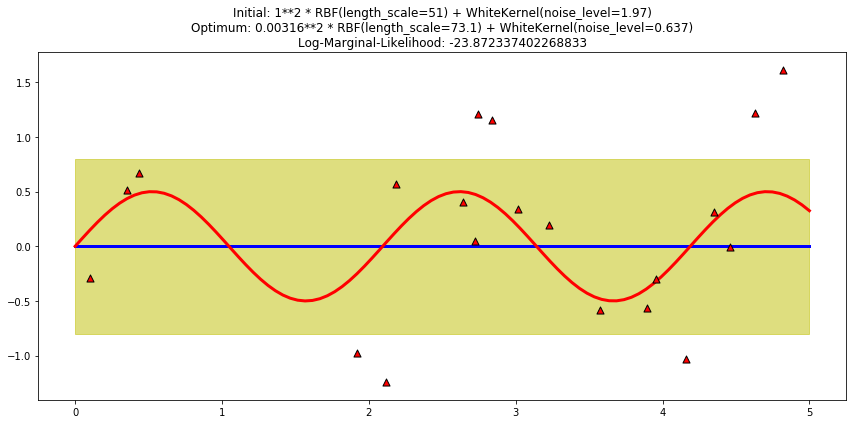

In [3]:
fig1=plt.figure(0, figsize=(12,6))
kernel = 1.0 * RBF(length_scale=51.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1.968, noise_level_bounds=(1e-10, 1e+1))

gp1 = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)

y_mean, y_cov = gp1.predict(X_[:, np.newaxis], return_cov=True)

y_pred = gp1.predict(X)

plt.plot(X_, y_mean, 'b', lw=3, zorder=9)

plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='y')

plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)

plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), marker='^')

plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp1.kernel_,
             gp1.log_marginal_likelihood(gp1.kernel_.theta)))

plt.tight_layout()

plt.show()

In [4]:
print('Score: %7.4f %%' % (gp1.score(X, y)*100))

Score: -4.3556 %


In [5]:
print('MSE: %7.5f' % (mean_squared_error(y,y_pred)))

MSE: 0.63720


In [6]:
print('MAE: %7.5f' % (median_absolute_error(y,y_pred)))

MAE: 0.56722


In [7]:
print('EVS: %7.5f' % (explained_variance_score(y,y_pred)))

EVS: -0.00000


In [8]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-008-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


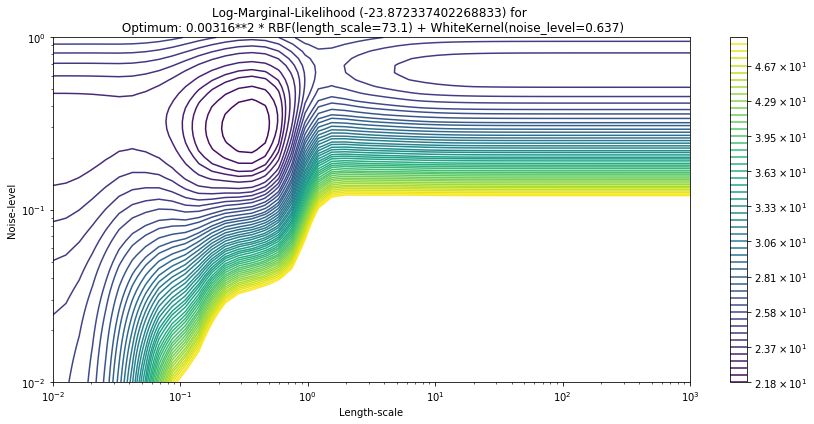

In [9]:
# Plot LML landscape
fig2=plt.figure(2, figsize=(12,6))

theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)

Theta0, Theta1 = np.meshgrid(theta0, theta1)

LML = [[gp1.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]

LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)

plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))

plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-Marginal-Likelihood (%s) for \n Optimum: %s" % (gp1.log_marginal_likelihood(gp1.kernel_.theta),gp1.kernel_))
plt.tight_layout()

plt.show()

In [10]:
print('Kernel Theta:', gp1.kernel_.theta)

Kernel Theta: [-11.51292546   4.29232703  -0.45065597]


In [11]:
print('Log marginal likelihood:', gp1.log_marginal_likelihood(gp1.kernel_.theta))

Log marginal likelihood: -23.872337402268833


In [12]:
print('Kernel:', gp1.kernel_)

Kernel: 0.00316**2 * RBF(length_scale=73.1) + WhiteKernel(noise_level=0.637)


In [13]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-008-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


## Part B

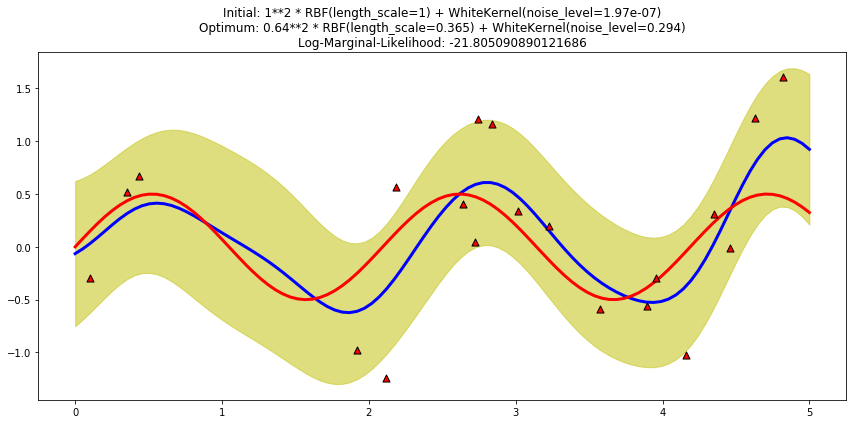

In [14]:
fig3=plt.figure(1, figsize=(12,6))
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1.968e-7, noise_level_bounds=(1e-10, 1e+1))

gp2 = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp2.predict(X_[:, np.newaxis], return_cov=True)

y_pred = gp2.predict(X)

plt.plot(X_, y_mean, 'b', lw=3, zorder=9)

plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='y')

plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)

plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), marker='^')

plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp2.kernel_,
             gp2.log_marginal_likelihood(gp2.kernel_.theta)))
plt.tight_layout()

plt.show()

In [15]:
print('Score: %7.4f %%' % (gp2.score(X, y)*100))

Score: 66.6001 %


In [16]:
print('MSE: %7.5f' % (mean_squared_error(y,y_pred)))

MSE: 0.20394


In [17]:
print('MAE: %7.5f' % (median_absolute_error(y,y_pred)))

MAE: 0.33841


In [18]:
print('EVS: %7.5f' % (explained_variance_score(y,y_pred)))

EVS: 0.66678


In [19]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-008-03.jpg'])
fig3.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


In [20]:
print('Kernel Theta:', gp2.kernel_.theta)

Kernel Theta: [-0.89335764 -1.00663692 -1.22409405]


In [21]:
print('Log marginal likelihood:', gp2.log_marginal_likelihood(gp2.kernel_.theta))

Log marginal likelihood: -21.805090890121686


In [22]:
print('Kernel:', gp2.kernel_)

Kernel: 0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294)


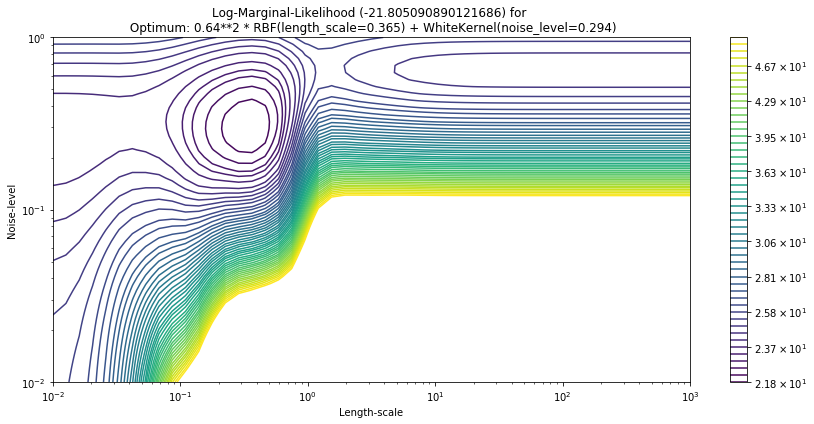

In [23]:
# Plot LML landscape
fig4=plt.figure(2, figsize=(12,6))

theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)

Theta0, Theta1 = np.meshgrid(theta0, theta1)

LML = [[gp2.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]

LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)

plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))

plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-Marginal-Likelihood (%s) for \n Optimum: %s" % (gp2.log_marginal_likelihood(gp2.kernel_.theta),gp2.kernel_))
plt.tight_layout()

plt.show()

In [24]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-008-04.jpg'])
fig4.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


## Part C

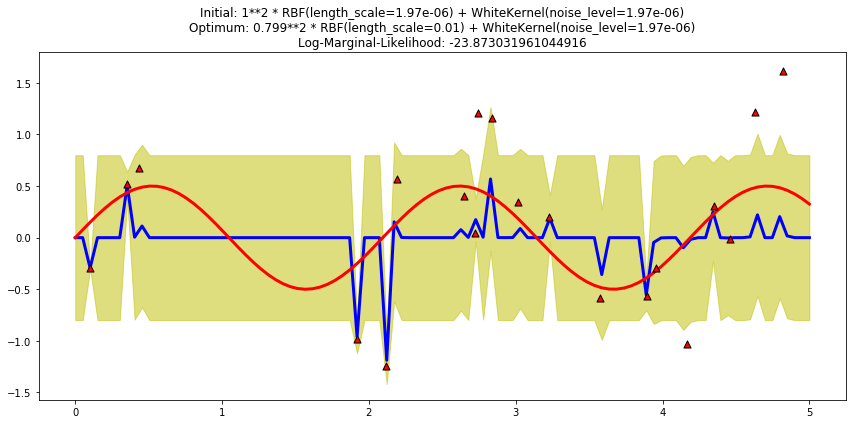

In [59]:
fig5=plt.figure(1, figsize=(12,6))
kernel = 1.0 * RBF(length_scale=1.968e-6, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1.968e-6, noise_level_bounds=(1e-10, 1e+1))

gp3 = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp3.predict(X_[:, np.newaxis], return_cov=True)

y_pred = gp3.predict(X)

plt.plot(X_, y_mean, 'b', lw=3, zorder=9)

plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='y')

plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)

plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), marker='^')

plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp3.kernel_,
             gp3.log_marginal_likelihood(gp3.kernel_.theta)))
plt.tight_layout()

plt.show()

In [60]:
print('Score: %7.15f %%' % (gp3.score(X, y)*100))

Score: 99.999999999002071 %


In [61]:
print('MSE: %7.15f' % (mean_squared_error(y,y_pred)))

MSE: 0.000000000006093


In [62]:
print('MAE: %7.15f' % (median_absolute_error(y,y_pred)))

MAE: 0.000001749845234


In [63]:
print('EVS: %7.15f' % (explained_variance_score(y,y_pred)))

EVS: 0.999999999990396


In [64]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-008-05.jpg'])
fig5.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


## Done

In [31]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-15 20:07:27.469290
